___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 

# Import esential Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score

from scipy.stats import skew

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Ingest the data to notebook

In [3]:
df = pd.read_csv('heart.csv')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.shape

(303, 14)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.000,54.366,9.082,29.000,47.500,55.000,61.000,77.000
sex,303.000,0.683,0.466,0.000,0.000,1.000,1.000,1.000
cp,303.000,0.967,1.032,0.000,0.000,1.000,2.000,3.000
trestbps,303.000,131.624,17.538,94.000,120.000,130.000,140.000,200.000
chol,303.000,246.264,51.831,126.000,211.000,240.000,274.500,564.000
fbs,303.000,0.149,0.356,0.000,0.000,0.000,0.000,1.000
restecg,303.000,0.528,0.526,0.000,0.000,1.000,1.000,2.000
thalach,303.000,149.647,22.905,71.000,133.500,153.000,166.000,202.000
exang,303.000,0.327,0.470,0.000,0.000,0.000,1.000,1.000
oldpeak,303.000,1.040,1.161,0.000,0.000,0.800,1.600,6.200


# EDA

In [17]:
df = df.astype({"sex": str, "cp": str,"fbs": str, "restecg":str, "exang":str,"slope":str, "thal":str, })

In [18]:
df = pd.get_dummies(df, drop_first= True )

In [19]:
df

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
0,63,145,233,150,2.300,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.500,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0
2,41,130,204,172,1.400,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
3,56,120,236,178,0.800,0,1,1,1,0,0,0,1,0,0,0,1,0,1,0
4,57,120,354,163,0.600,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.200,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1
299,45,110,264,132,1.200,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
300,68,144,193,141,3.400,2,0,1,0,0,0,1,1,0,0,1,0,0,0,1
301,57,130,131,115,1.200,1,0,1,0,0,0,0,1,0,1,1,0,0,0,1


In [21]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

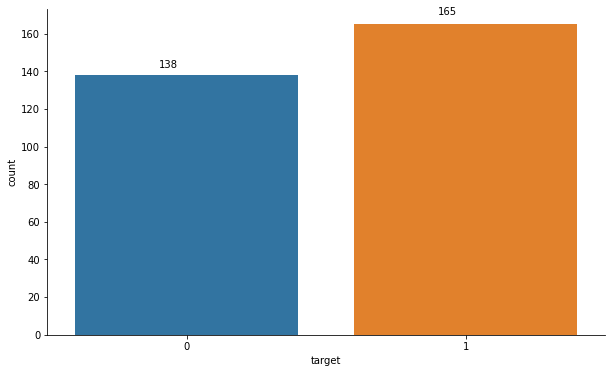

In [22]:
ax = sns.countplot(df.target)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

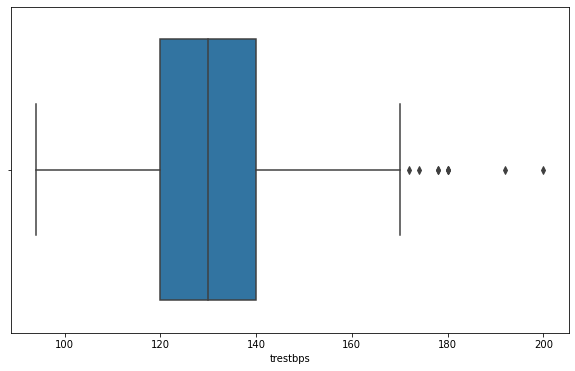

In [23]:
sns.boxplot(df.trestbps);

In [24]:
df[df.trestbps > 170]

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
8,52,172,199,162,0.500,0,1,1,0,1,0,1,1,0,0,0,1,0,0,1
101,59,178,270,145,4.200,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1
110,64,180,325,154,0.000,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0
203,68,180,274,150,1.600,0,0,1,0,1,0,1,0,0,1,1,0,0,0,1
223,56,200,288,133,4.000,2,0,0,0,0,0,1,0,0,1,0,0,0,0,1
241,59,174,249,143,0.000,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0
248,54,192,283,195,0.000,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1
260,66,178,228,165,1.000,2,0,0,0,0,0,1,1,0,1,1,0,0,0,1
266,55,180,327,117,3.400,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0


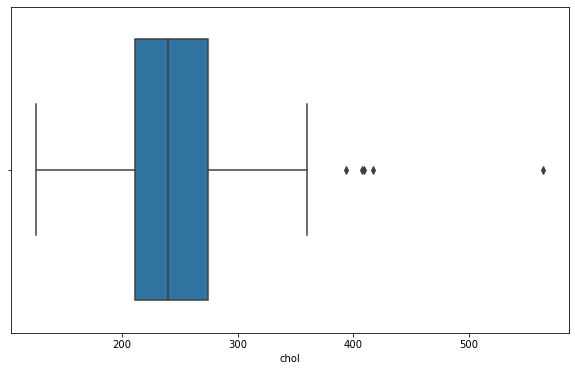

In [25]:
sns.boxplot(df.chol);

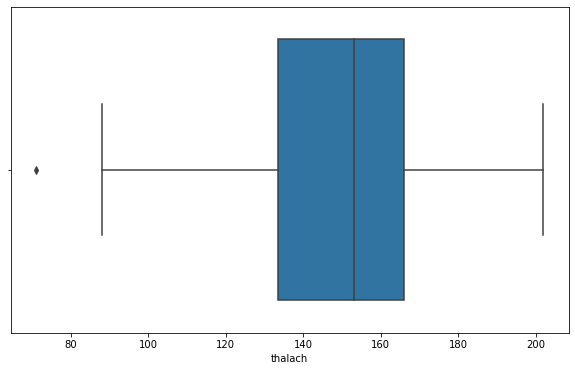

In [26]:
sns.boxplot(df.thalach);

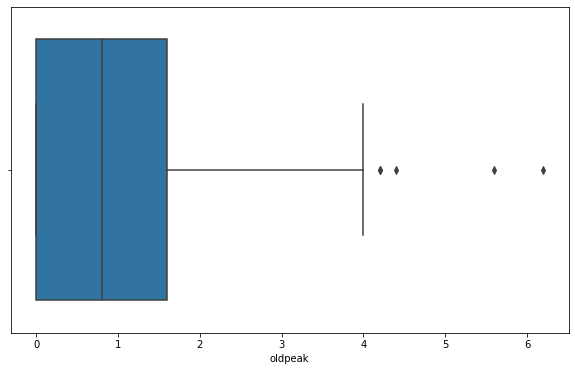

In [27]:
sns.boxplot(df.oldpeak);

In [28]:
df

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
0,63,145,233,150,2.300,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.500,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0
2,41,130,204,172,1.400,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
3,56,120,236,178,0.800,0,1,1,1,0,0,0,1,0,0,0,1,0,1,0
4,57,120,354,163,0.600,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.200,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1
299,45,110,264,132,1.200,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
300,68,144,193,141,3.400,2,0,1,0,0,0,1,1,0,0,1,0,0,0,1
301,57,130,131,115,1.200,1,0,1,0,0,0,0,1,0,1,1,0,0,0,1


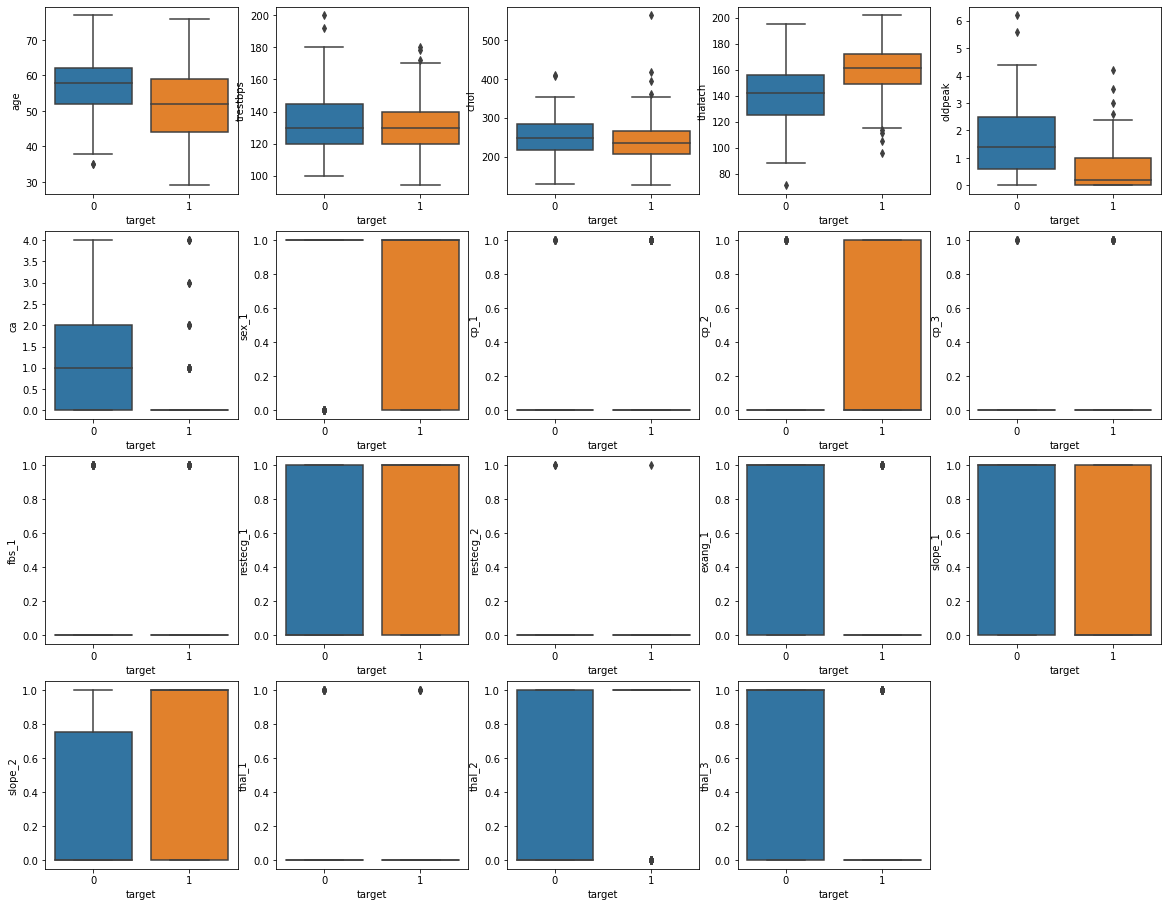

In [225]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns :
    if feature != 'target' :
        index += 1
        plt.subplot(5,5,index)
        sns.boxplot(x = 'target', y = feature, data = df)

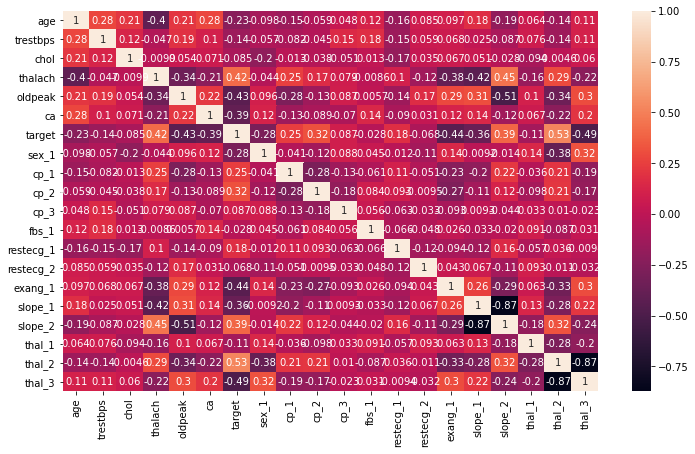

In [30]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot = True);

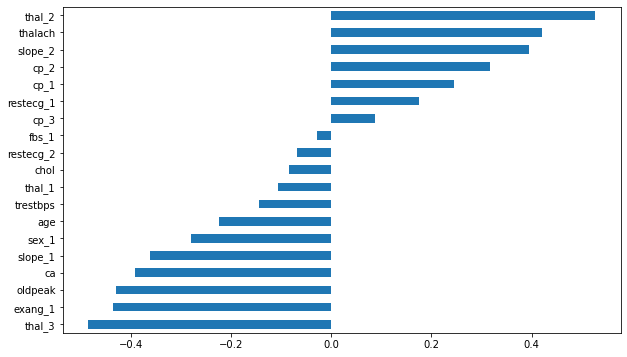

In [31]:
df.corr()["target"].drop("target").sort_values().plot.barh();

In [32]:
df

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
0,63,145,233,150,2.300,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.500,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0
2,41,130,204,172,1.400,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
3,56,120,236,178,0.800,0,1,1,1,0,0,0,1,0,0,0,1,0,1,0
4,57,120,354,163,0.600,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.200,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1
299,45,110,264,132,1.200,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
300,68,144,193,141,3.400,2,0,1,0,0,0,1,1,0,0,1,0,0,0,1
301,57,130,131,115,1.200,1,0,1,0,0,0,0,1,0,1,1,0,0,0,1


In [33]:
df_cont = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']]
df_cont

,age,trestbps,chol,thalach,oldpeak,target
0,63,145,233,150,2.300,1
1,37,130,250,187,3.500,1
2,41,130,204,172,1.400,1
3,56,120,236,178,0.800,1
4,57,120,354,163,0.600,1
...,...,...,...,...,...,...
298,57,140,241,123,0.200,0
299,45,110,264,132,1.200,0
300,68,144,193,141,3.400,0
301,57,130,131,115,1.200,0


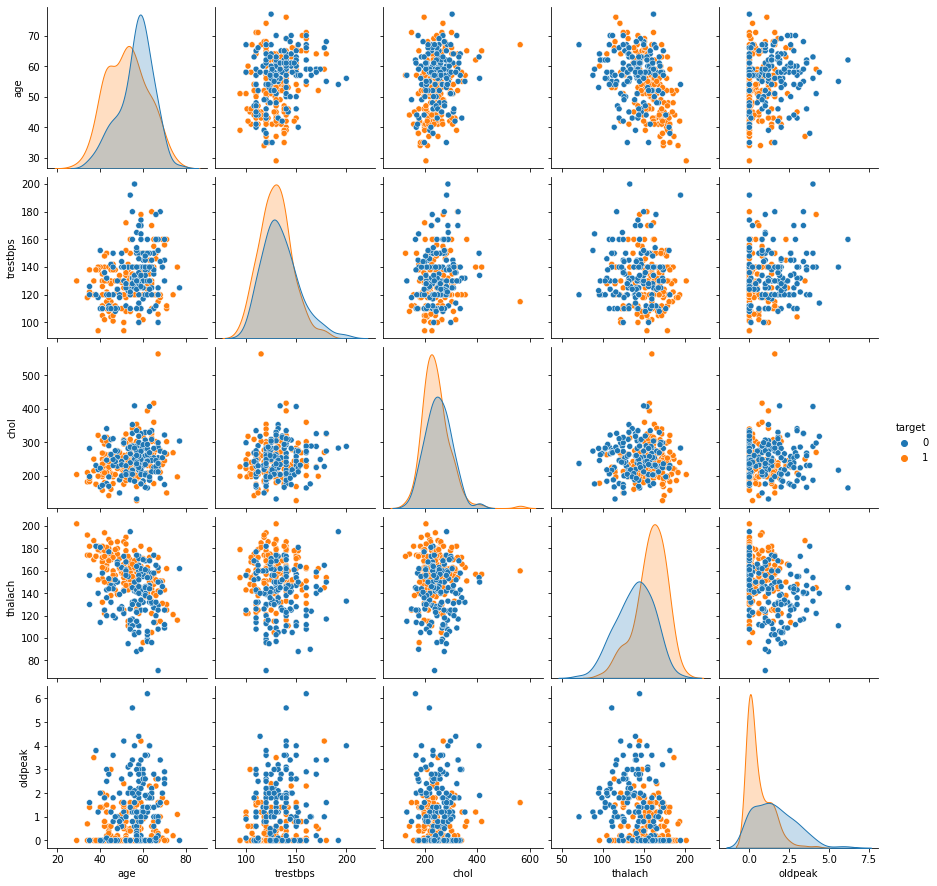

In [34]:
sns.pairplot(df_cont, hue = 'target');

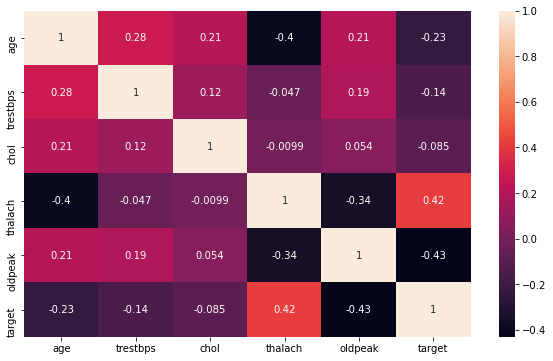

In [35]:
sns.heatmap(df_cont.corr(), annot = True);

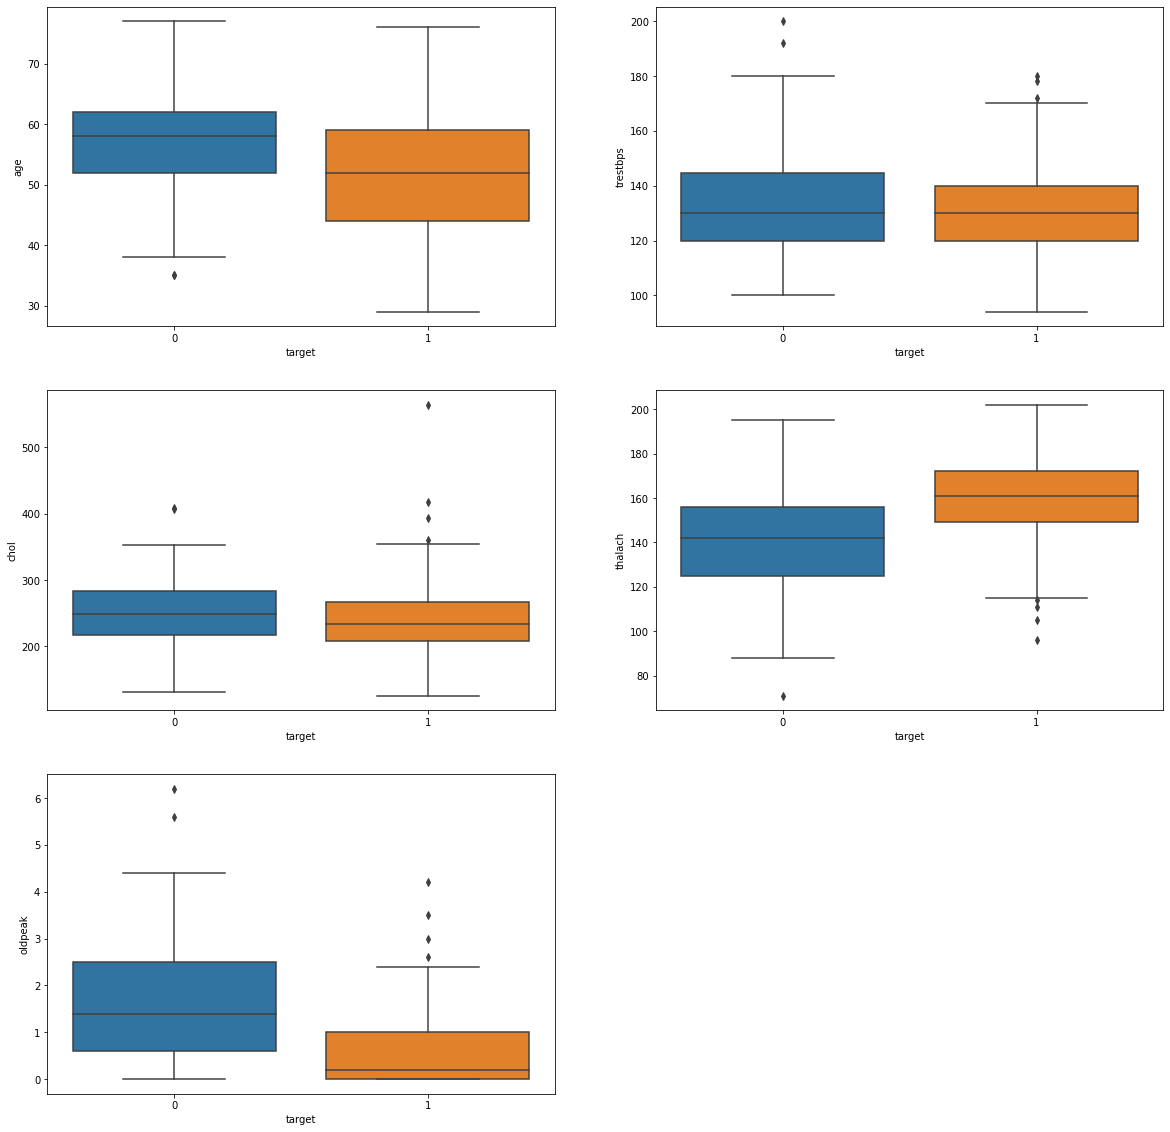

In [36]:
index = 0
plt.figure(figsize=(20,20))
for feature in df_cont.columns :
    if feature != 'target' :
        index += 1
        plt.subplot(3,2,index)
        sns.boxplot(x = 'target', y = feature, data = df_cont)

# Data Preprocessing

In [144]:
X = df.drop('target', axis = 1)
y = df.target

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify = y, random_state = 42)

In [146]:
scaler = MinMaxScaler()

In [147]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[0.83333333, 0.43396226, 0.39929329, ..., 0.        , 1.        ,
        0.        ],
       [0.77083333, 0.62264151, 0.42402827, ..., 1.        , 0.        ,
        0.        ],
       [0.54166667, 0.32075472, 0.27915194, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.45833333, 0.24528302, 0.59717314, ..., 0.        , 1.        ,
        0.        ],
       [0.54166667, 0.33962264, 0.48056537, ..., 0.        , 1.        ,
        0.        ],
       [0.72916667, 0.81132075, 0.70318021, ..., 0.        , 1.        ,
        0.        ]])

In [148]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[0.58333333, 0.52830189, 0.53003534, ..., 1.        , 0.        ,
        0.        ],
       [0.79166667, 0.29245283, 0.45229682, ..., 0.        , 0.        ,
        1.        ],
       [0.35416667, 0.43396226, 0.65371025, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.52083333, 0.1509434 , 0.39929329, ..., 0.        , 0.        ,
        1.        ],
       [0.60416667, 0.52830189, 0.50883392, ..., 0.        , 0.        ,
        1.        ],
       [0.41666667, 0.33962264, 0.49469965, ..., 0.        , 1.        ,
        0.        ]])

# Implement Logistic Regression and Evaluate

In [149]:
from sklearn.linear_model import LogisticRegression

In [150]:
log_model = LogisticRegression()

In [151]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [152]:
df.shape

(303, 20)

In [153]:
log_model.coef_    # Her feature için bir katsayı verdi.

array([[-0.30374919, -0.40897071, -1.10785963,  0.73469119, -1.01648188,
        -1.3737707 , -0.76062351,  0.80249872,  1.40470245,  1.26501399,
        -0.04725028,  0.56365436, -0.17736878, -0.90245244, -0.38616745,
         0.5312044 , -0.04885604,  0.81874373, -0.8617437 ]])

In [154]:
log_model.intercept_    # (-) ise olasılıkta <0.5 çıkar ve testten geçemez, (+) ise >0.5 çıkar ve testi geçer. 

array([0.81663978])

# Predicting :

In [155]:
y_pred = log_model.predict(X_test_scaled)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [156]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba                                           # İlk değer 0'ı, ikinci değer 1'i temsil ediyor.

array([[0.92750977, 0.07249023],
       [0.8548267 , 0.1451733 ],
       [0.96496458, 0.03503542],
       [0.22642222, 0.77357778],
       [0.47782489, 0.52217511],
       [0.86577517, 0.13422483],
       [0.11450966, 0.88549034],
       [0.5299377 , 0.4700623 ],
       [0.02560068, 0.97439932],
       [0.65007035, 0.34992965],
       [0.85286955, 0.14713045],
       [0.49379929, 0.50620071],
       [0.93166128, 0.06833872],
       [0.05899077, 0.94100923],
       [0.02742734, 0.97257266],
       [0.15704118, 0.84295882],
       [0.04274797, 0.95725203],
       [0.33024124, 0.66975876],
       [0.1245912 , 0.8754088 ],
       [0.39732739, 0.60267261],
       [0.17010553, 0.82989447],
       [0.6216282 , 0.3783718 ],
       [0.06744287, 0.93255713],
       [0.18007886, 0.81992114],
       [0.13242344, 0.86757656],
       [0.91193672, 0.08806328],
       [0.81918908, 0.18081092],
       [0.35609717, 0.64390283],
       [0.76160868, 0.23839132],
       [0.20363338, 0.79636662],
       [0.

In [157]:
test_data = pd.concat([X_test, y_test], axis = 1)
test_data

,age,trestbps,chol,thalach,oldpeak,ca,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3,target
179,57,150,276,112,0.600,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0
197,67,125,254,163,0.200,2,1,0,0,0,1,1,0,0,1,0,0,0,1,0
285,46,140,311,120,1.800,2,1,0,0,0,0,1,0,1,1,0,0,0,1,0
194,60,140,185,155,3.000,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0
188,50,140,233,163,0.600,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,58,150,283,162,1.000,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1
4,57,120,354,163,0.600,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1
224,54,110,239,126,2.800,1,1,0,0,0,0,1,0,1,1,0,0,0,1,0
202,58,150,270,111,0.800,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0


In [158]:
test_data['pred_proba'] = y_pred_proba[:,1]   

# y_pred_proba'dan sadece sonucu 1 döndüren sütunu aldık, çünkü hedef değerimiz 1.

In [159]:
test_data['pred'] = y_pred    # pred_prob 1 olma ihtimallerin yüzdesini, pred ise bu yüzde sonuçlarını veriyor.
test_data        

,age,trestbps,chol,thalach,oldpeak,ca,sex_1,cp_1,cp_2,cp_3,...,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3,target,pred_proba,pred
179,57,150,276,112,0.600,1,1,0,0,0,...,0,1,1,0,1,0,0,0,0.072,0
197,67,125,254,163,0.200,2,1,0,0,0,...,0,0,1,0,0,0,1,0,0.145,0
285,46,140,311,120,1.800,2,1,0,0,0,...,0,1,1,0,0,0,1,0,0.035,0
194,60,140,185,155,3.000,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0.774,1
188,50,140,233,163,0.600,1,1,0,1,0,...,0,0,1,0,0,0,1,0,0.522,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,58,150,283,162,1.000,0,0,0,0,1,...,0,0,0,1,0,1,0,1,0.936,1
4,57,120,354,163,0.600,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0.739,1
224,54,110,239,126,2.800,1,1,0,0,0,...,0,1,1,0,0,0,1,0,0.060,0
202,58,150,270,111,0.800,0,1,0,0,0,...,0,1,0,1,0,0,1,0,0.107,0


In [160]:
test_data.sample(10)

,age,trestbps,chol,thalach,oldpeak,ca,sex_1,cp_1,cp_2,cp_3,...,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3,target,pred_proba,pred
271,61,134,234,145,2.600,2,1,0,0,1,...,0,0,1,0,0,1,0,0,0.688,1
252,62,138,294,106,1.900,3,0,0,0,0,...,0,0,1,0,0,1,0,0,0.378,0
61,54,108,309,156,0.000,0,1,1,0,0,...,0,0,0,1,0,0,1,1,0.646,1
133,41,110,235,153,0.000,0,1,1,0,0,...,0,0,0,1,0,1,0,1,0.933,1
239,35,126,282,156,0.000,0,1,0,0,0,...,0,1,0,1,0,0,1,0,0.181,0
131,49,134,271,162,0.000,0,0,1,0,0,...,0,0,1,0,0,1,0,1,0.904,1
28,65,140,417,157,0.800,1,0,0,1,0,...,0,0,0,1,0,1,0,1,0.875,1
167,62,140,268,160,3.600,2,0,0,0,0,...,0,0,0,0,0,1,0,0,0.470,0
217,63,130,330,132,1.800,3,1,0,0,0,...,0,1,0,1,0,0,1,0,0.032,0
12,49,130,266,171,0.600,0,1,1,0,0,...,0,0,0,1,0,1,0,1,0.916,1


# Model Performance

In [161]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

ACCURACY :

In [162]:
accuracy_score(y_test, y_pred)

0.7868852459016393

PRECISION :

In [163]:
precision_score(y_test, y_pred)

0.7777777777777778

RECALL :

In [164]:
recall_score(y_test, y_pred)

0.8484848484848485

F1-SCORE :

In [165]:
f1_score(y_test, y_pred)

0.8115942028985507

CONFUSION MATRIX :

Yukarıdaki bütün skorları confusion_matrix ile tek seferde hesaplayabiliriz :

In [166]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [167]:
confusion_matrix(y_test, y_pred)

array([[20,  8],
       [ 5, 28]], dtype=int64)

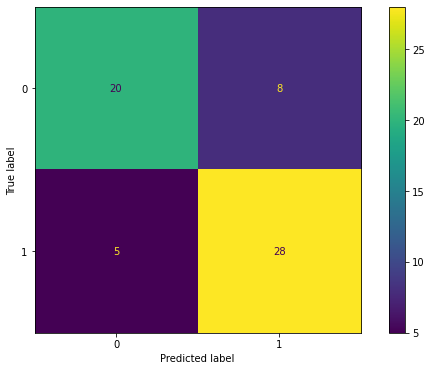

In [168]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

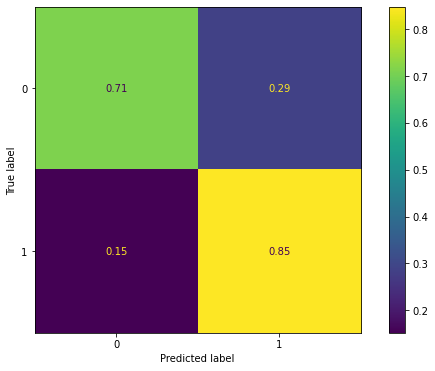

In [169]:
plot_confusion_matrix(log_model, X_test_scaled, y_test, normalize='true');

# Normalize=True; satır bazında oranlara bakar.  

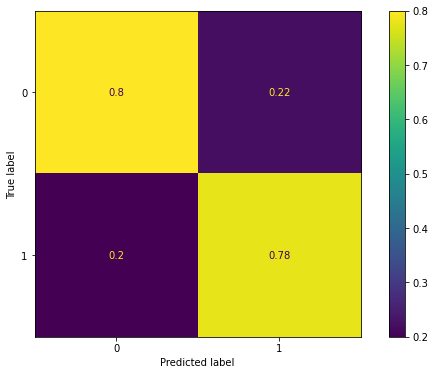

In [170]:
plot_confusion_matrix(log_model, X_test_scaled, y_test, normalize='pred');

# Normalize=pred; sütun bazında oranlara bakar.

In [171]:
print(classification_report(y_test,y_pred))

# 0 ve 1 için bütün skorları tek bir sütunda verdi.

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        28
           1       0.78      0.85      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



In [172]:
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       110
           1       0.85      0.89      0.87       132

    accuracy                           0.86       242
   macro avg       0.86      0.85      0.85       242
weighted avg       0.86      0.86      0.86       242



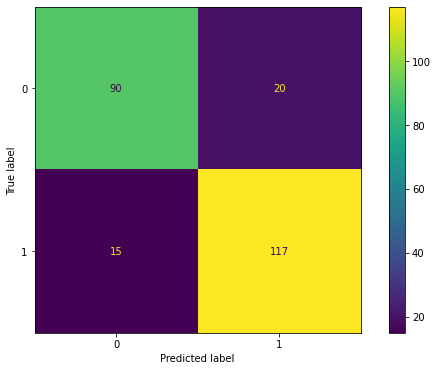

In [173]:
plot_confusion_matrix(log_model, X_train_scaled, y_train);

Tüm skorları bir arada görmek için genel bir fonksiyon da kullanabiliriz : ?????

In [174]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [183]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[20  8]
 [ 5 28]]
              precision    recall  f1-score   support

           0       0.80      0.71      0.75        28
           1       0.78      0.85      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61


Train_Set
[[ 90  20]
 [ 15 117]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       110
           1       0.85      0.89      0.87       132

    accuracy                           0.86       242
   macro avg       0.86      0.85      0.85       242
weighted avg       0.86      0.86      0.86       242



# Cross Validate

In [176]:
from sklearn.model_selection import cross_validate

In [177]:
from sklearn.metrics import SCORERS
list(SCORERS.keys())

['explained_variance',
 'r2',
 'max_error',
 'neg_median_absolute_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_root_mean_squared_error',
 'neg_mean_poisson_deviance',
 'neg_mean_gamma_deviance',
 'accuracy',
 'top_k_accuracy',
 'roc_auc',
 'roc_auc_ovr',
 'roc_auc_ovo',
 'roc_auc_ovr_weighted',
 'roc_auc_ovo_weighted',
 'balanced_accuracy',
 'average_precision',
 'neg_log_loss',
 'neg_brier_score',
 'adjusted_rand_score',
 'rand_score',
 'homogeneity_score',
 'completeness_score',
 'v_measure_score',
 'mutual_info_score',
 'adjusted_mutual_info_score',
 'normalized_mutual_info_score',
 'fowlkes_mallows_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'jaccard',
 'jaccard_macro',
 'jaccard_m

In [184]:
model = LogisticRegression()

In [185]:
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision', 'recall', 'f1',  'accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1,11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.031,0.016,0.857,0.857,0.857,0.840
2,0.016,0.016,0.733,0.786,0.759,0.720
3,0.016,0.009,0.786,0.846,0.815,0.792
4,0.020,0.010,0.867,1.000,0.929,0.917
5,0.018,0.010,0.923,0.923,0.923,0.917
6,0.020,0.002,0.733,0.846,0.786,0.750
7,0.020,0.010,0.917,0.846,0.880,0.875
8,0.022,0.008,0.909,0.769,0.833,0.833
9,0.020,0.002,0.917,0.846,0.880,0.875
10,0.028,0.002,0.867,1.000,0.929,0.917


In [186]:
df_scores.mean()[2:]

test_precision   0.851
test_recall      0.872
test_f1          0.859
test_accuracy    0.843
dtype: float64

In [187]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[20  8]
 [ 5 28]]
              precision    recall  f1-score   support

           0       0.80      0.71      0.75        28
           1       0.78      0.85      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61


Train_Set
[[ 90  20]
 [ 15 117]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       110
           1       0.85      0.89      0.87       132

    accuracy                           0.86       242
   macro avg       0.86      0.85      0.85       242
weighted avg       0.86      0.86      0.86       242



# GridSearch for Logistic Regression:

In [226]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [227]:
from sklearn.model_selection import GridSearchCV

In [228]:
model = LogisticRegression()

In [229]:
penalty = ["l1", "l2"]                
C = np.logspace(-1, 5, 20)            
class_weight= ["balanced", None]      

# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies 
# in the input data

solver = ["lbfgs", "liblinear", "sag", "saga"]   

In [230]:
param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}


grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall",       
                          n_jobs = -1)    

In [231]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='recall')

In [232]:
grid_model.best_params_ 

{'C': 3.79269019073225,
 'class_weight': None,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [233]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set

[[20  8]
 [ 4 29]]
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        28
           1       0.78      0.88      0.83        33

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61


Train_Set

[[ 89  21]
 [ 13 119]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       110
           1       0.85      0.90      0.88       132

    accuracy                           0.86       242
   macro avg       0.86      0.86      0.86       242
weighted avg       0.86      0.86      0.86       242



# ROC/AUC for Logistic Regression:

In [236]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

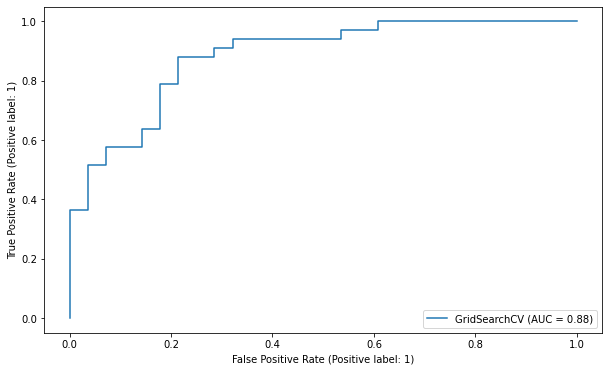

In [245]:
plot_roc_curve(grid_model, X_test_scaled, y_test);  

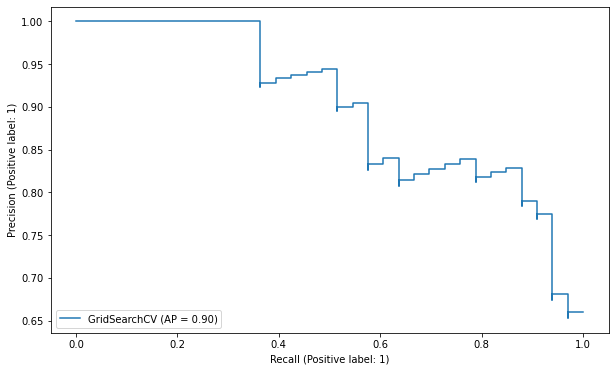

In [246]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test);

# Best Treshold for Logistic Regression:

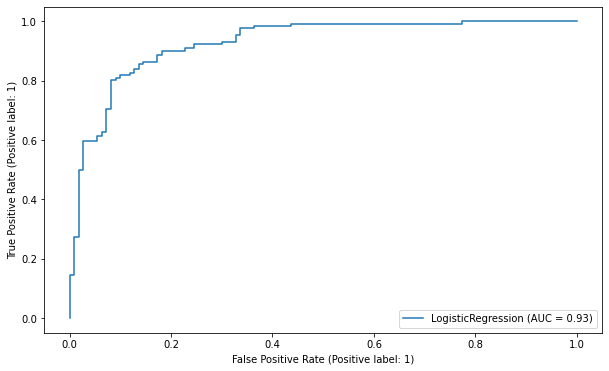

In [251]:
plot_roc_curve(log_model, X_train_scaled, y_train);  
# Data balance durumda olduğu için AOC yöntemini tercih ediyoruz.

In [253]:
y_pred_proba = log_model.predict_proba(X_train_scaled)  # Train setindeki predict_proba' yı aldık ki yukardaki grafikteki skorla karşılaştırabilelim.
roc_auc_score(y_train, y_pred_proba[:,1])  

0.9278236914600552

In [254]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

In [255]:
fp_rate    # Her bir treshold'a göre aldığı olasılık değerleri.

array([0.        , 0.        , 0.        , 0.00909091, 0.00909091,
       0.01818182, 0.01818182, 0.01818182, 0.01818182, 0.02727273,
       0.02727273, 0.05454545, 0.05454545, 0.06363636, 0.06363636,
       0.07272727, 0.07272727, 0.08181818, 0.08181818, 0.09090909,
       0.09090909, 0.1       , 0.1       , 0.11818182, 0.11818182,
       0.12727273, 0.12727273, 0.13636364, 0.13636364, 0.14545455,
       0.14545455, 0.17272727, 0.17272727, 0.18181818, 0.18181818,
       0.22727273, 0.22727273, 0.24545455, 0.24545455, 0.3       ,
       0.3       , 0.32727273, 0.32727273, 0.33636364, 0.33636364,
       0.36363636, 0.36363636, 0.43636364, 0.43636364, 0.77272727,
       0.77272727, 1.        ])

In [243]:
tp_rate     #Her bir treshold'a göre aldığı olasılık değerleri.

array([0.        , 0.00757576, 0.14393939, 0.14393939, 0.27272727,
       0.27272727, 0.45454545, 0.46969697, 0.5       , 0.5       ,
       0.59848485, 0.59848485, 0.61363636, 0.61363636, 0.62878788,
       0.62878788, 0.70454545, 0.70454545, 0.8030303 , 0.8030303 ,
       0.81060606, 0.81060606, 0.81818182, 0.81818182, 0.82575758,
       0.82575758, 0.84090909, 0.84090909, 0.85606061, 0.85606061,
       0.86363636, 0.86363636, 0.88636364, 0.88636364, 0.90151515,
       0.90151515, 0.90909091, 0.90909091, 0.92424242, 0.92424242,
       0.93181818, 0.93181818, 0.95454545, 0.95454545, 0.97727273,
       0.97727273, 0.98484848, 0.98484848, 0.99242424, 0.99242424,
       1.        , 1.        ])

In [244]:
optimal_idx = np.argmax(tp_rate - fp_rate)          # İçerideki max değer neyse onun index nosunu döndürür.
optimal_threshold = thresholds[optimal_idx]         # Bulunan indexi tresholdun içine verdik. En optimal treshold'u bize döndürür.
optimal_threshold

0.6666528926844527

# Implement KNN and Evaluate

In [196]:
from sklearn.neighbors import KNeighborsClassifier

In [216]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [198]:
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [199]:
y_pred = knn_model.predict(X_test_scaled)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [200]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)

In [201]:
pd.DataFrame(y_pred_proba)

,0,1
0,0.800,0.200
1,0.800,0.200
2,1.000,0.000
3,0.200,0.800
4,0.600,0.400
...,...,...
56,0.400,0.600
57,0.000,1.000
58,1.000,0.000
59,1.000,0.000


In [202]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [203]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
65,1,1,1.000,0.000
202,0,0,0.000,1.000
100,1,1,0.600,0.400
136,1,1,1.000,0.000
240,0,0,0.200,0.800
167,0,1,0.800,0.200
188,0,0,0.400,0.600
179,0,0,0.200,0.800
0,1,1,0.600,0.400
268,0,0,0.200,0.800


# Model Performance on Classification Tasks

In [204]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [205]:
confusion_matrix(y_test, y_pred)

array([[20,  8],
       [ 6, 27]], dtype=int64)

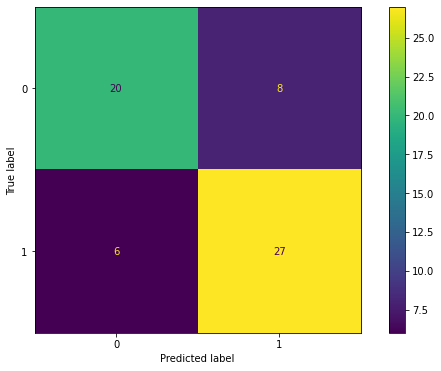

In [206]:
plot_confusion_matrix(knn_model, X_test_scaled, y_test);

In [207]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  8]
 [ 6 27]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        28
           1       0.77      0.82      0.79        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



# Elbow Method for Choosing Reasonable K Values

In [208]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [209]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

In [210]:
test_error_rates

[0.3114754098360656,
 0.3278688524590164,
 0.29508196721311475,
 0.2622950819672131,
 0.2295081967213115,
 0.2622950819672131,
 0.24590163934426235,
 0.2295081967213115,
 0.24590163934426235,
 0.2786885245901639,
 0.2622950819672131,
 0.2622950819672131,
 0.24590163934426235,
 0.2622950819672131,
 0.2295081967213115,
 0.24590163934426235,
 0.2295081967213115,
 0.2622950819672131,
 0.2295081967213115,
 0.2622950819672131,
 0.2295081967213115,
 0.2295081967213115,
 0.19672131147540983,
 0.2295081967213115,
 0.21311475409836067,
 0.2295081967213115,
 0.21311475409836067,
 0.21311475409836067,
 0.24590163934426235]

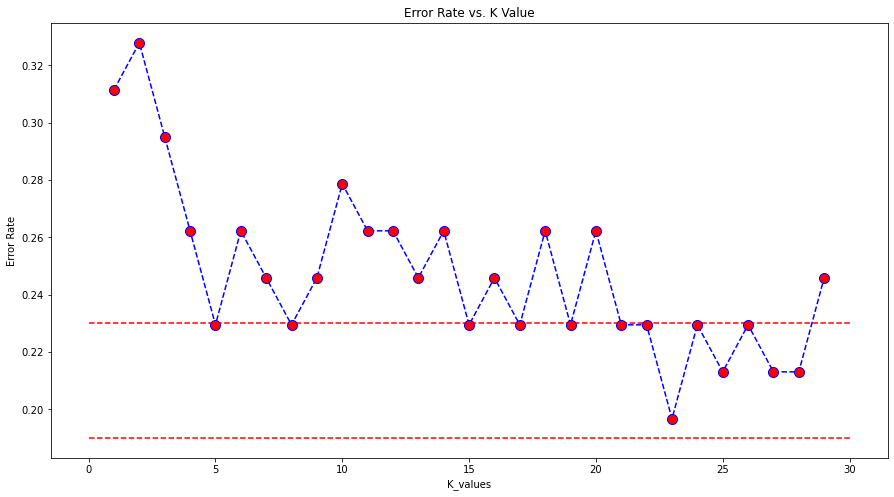

In [215]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.19, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.23, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

In [218]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set\n")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set\n")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [219]:
knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train_scaled,y_train)
print('WITH K=8\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=8

Test_Set

[[21  7]
 [ 7 26]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        28
           1       0.79      0.79      0.79        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61


Train_Set

[[ 98  12]
 [ 26 106]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       110
           1       0.90      0.80      0.85       132

    accuracy                           0.84       242
   macro avg       0.84      0.85      0.84       242
weighted avg       0.85      0.84      0.84       242



In [220]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train_scaled,y_train)
print('WITH K=15\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=15

Test_Set

[[21  7]
 [ 7 26]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        28
           1       0.79      0.79      0.79        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61


Train_Set

[[ 94  16]
 [ 24 108]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       110
           1       0.87      0.82      0.84       132

    accuracy                           0.83       242
   macro avg       0.83      0.84      0.83       242
weighted avg       0.84      0.83      0.84       242



In [221]:
knn = KNeighborsClassifier(n_neighbors=17)

knn.fit(X_train_scaled,y_train)
print('WITH K=17\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=17

Test_Set

[[21  7]
 [ 7 26]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        28
           1       0.79      0.79      0.79        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61


Train_Set

[[ 94  16]
 [ 24 108]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       110
           1       0.87      0.82      0.84       132

    accuracy                           0.83       242
   macro avg       0.83      0.84      0.83       242
weighted avg       0.84      0.83      0.84       242



In [222]:
knn = KNeighborsClassifier(n_neighbors=19)

knn.fit(X_train_scaled,y_train)
print('WITH K=19\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=19

Test_Set

[[21  7]
 [ 7 26]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        28
           1       0.79      0.79      0.79        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61


Train_Set

[[ 94  16]
 [ 23 109]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       110
           1       0.87      0.83      0.85       132

    accuracy                           0.84       242
   macro avg       0.84      0.84      0.84       242
weighted avg       0.84      0.84      0.84       242



In [223]:
knn = KNeighborsClassifier(n_neighbors=21)

knn.fit(X_train_scaled,y_train)
print('WITH K=21\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=21

Test_Set

[[21  7]
 [ 7 26]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        28
           1       0.79      0.79      0.79        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61


Train_Set

[[ 92  18]
 [ 23 109]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       110
           1       0.86      0.83      0.84       132

    accuracy                           0.83       242
   macro avg       0.83      0.83      0.83       242
weighted avg       0.83      0.83      0.83       242



In [257]:
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train_scaled,y_train)
print('WITH K=23\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=23

Test_Set

[[21  7]
 [ 5 28]]
              precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61


Train_Set

[[ 93  17]
 [ 21 111]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       110
           1       0.87      0.84      0.85       132

    accuracy                           0.84       242
   macro avg       0.84      0.84      0.84       242
weighted avg       0.84      0.84      0.84       242



# Cross Validate for Optimal K Value:

In [258]:
from sklearn.model_selection import cross_val_score, cross_validate

In [259]:
model = KNeighborsClassifier(n_neighbors=23)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.007,0.009,0.800,0.846,0.786,0.815
2,0.001,0.012,0.840,0.857,0.857,0.857
3,0.001,0.013,0.708,0.688,0.846,0.759
4,0.001,0.010,0.917,0.867,1.000,0.929
5,0.002,0.012,0.833,0.909,0.769,0.833
6,0.003,0.011,0.750,0.733,0.846,0.786
7,0.001,0.012,0.833,0.909,0.769,0.833
8,0.001,0.008,0.833,0.909,0.769,0.833
9,0.002,0.012,0.833,0.909,0.769,0.833
10,0.001,0.013,0.875,0.857,0.923,0.889


In [260]:
df_scores.mean()[2:]

test_accuracy    0.822
test_precision   0.848
test_recall      0.834
test_f1          0.837
dtype: float64

# Gridsearch Method for Choosing Reasonable K Values

In [267]:
from sklearn.model_selection import GridSearchCV

In [268]:
knn_grid = KNeighborsClassifier()

In [269]:
k_values= range(1,30)

In [270]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

In [271]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')

In [273]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [274]:
knn_grid_model.best_params_

{'n_neighbors': 29, 'p': 2, 'weights': 'distance'}

In [275]:
print('WITH K=29\n')
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=29

Test_Set

[[19  9]
 [ 6 27]]
              precision    recall  f1-score   support

           0       0.76      0.68      0.72        28
           1       0.75      0.82      0.78        33

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61


Train_Set

[[110   0]
 [  0 132]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       132

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



In [276]:
knn_model = KNeighborsClassifier(n_neighbors=23).fit(X_train_scaled, y_train)

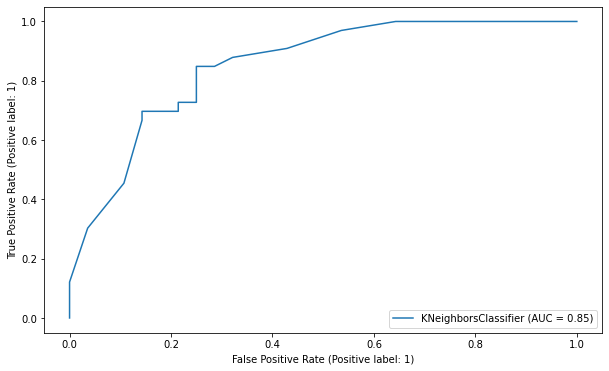

In [278]:
plot_roc_curve(knn_model, X_test_scaled, y_test);

# Visually compare models based on your chosen metric

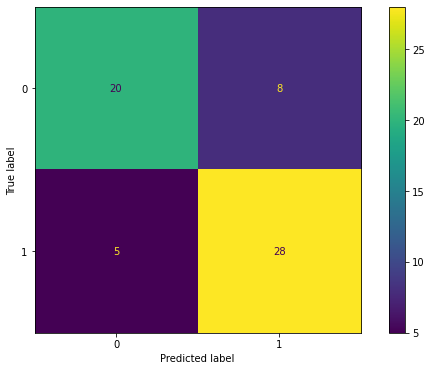

In [279]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

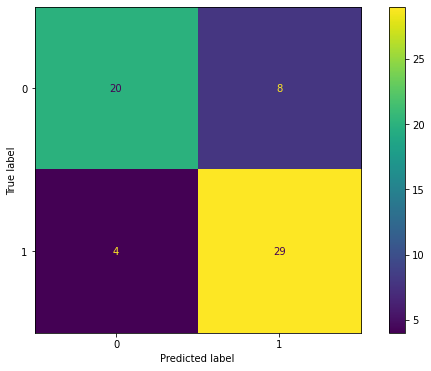

In [280]:
plot_confusion_matrix(grid_model, X_test_scaled, y_test);

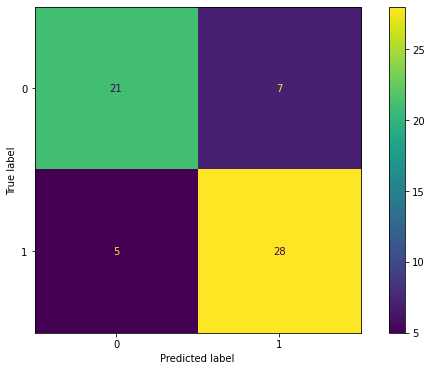

In [281]:
plot_confusion_matrix(knn_model, X_test_scaled, y_test);

In [282]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set

[[20  8]
 [ 5 28]]
              precision    recall  f1-score   support

           0       0.80      0.71      0.75        28
           1       0.78      0.85      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61


Train_Set

[[ 90  20]
 [ 15 117]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       110
           1       0.85      0.89      0.87       132

    accuracy                           0.86       242
   macro avg       0.86      0.85      0.85       242
weighted avg       0.86      0.86      0.86       242



In [283]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set

[[20  8]
 [ 4 29]]
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        28
           1       0.78      0.88      0.83        33

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61


Train_Set

[[ 89  21]
 [ 13 119]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       110
           1       0.85      0.90      0.88       132

    accuracy                           0.86       242
   macro avg       0.86      0.86      0.86       242
weighted avg       0.86      0.86      0.86       242



In [284]:
eval_metric(knn_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set

[[21  7]
 [ 5 28]]
              precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61


Train_Set

[[ 93  17]
 [ 21 111]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       110
           1       0.87      0.84      0.85       132

    accuracy                           0.84       242
   macro avg       0.84      0.84      0.84       242
weighted avg       0.84      0.84      0.84       242



# Chose best model

In [285]:
import pickle

In [286]:
scaler = StandardScaler()

In [287]:
scaler.fit(X)

StandardScaler()

In [288]:
pickle.dump(scaler, open('scaler_knn_heart.pkl', 'wb'))

In [289]:
X_scaled = scaler.transform(X)

In [290]:
final_knn_model = KNeighborsClassifier(n_neighbors=23)

In [291]:
pickle.dump(final_knn_model, open('knn_final_heart.pkl', 'wb'))

# Make a random prediction 

In [292]:
loaded_scaler = pickle.load(open('scaler_knn_heart.pkl', 'rb'))

In [293]:
loaded_model = pickle.load(open('knn_final_heart.pkl', 'rb'))

In [294]:
X.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'sex_1', 'cp_1',
       'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1', 'slope_1',
       'slope_2', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [295]:
X.describe()

,age,trestbps,chol,thalach,oldpeak,ca,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
count,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000
mean,54.366,131.624,246.264,149.647,1.040,0.729,0.683,0.165,0.287,0.076,0.149,0.502,0.013,0.327,0.462,0.469,0.059,0.548,0.386
std,9.082,17.538,51.831,22.905,1.161,1.023,0.466,0.372,0.453,0.265,0.356,0.501,0.114,0.470,0.499,0.500,0.237,0.499,0.488
min,29.000,94.000,126.000,71.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,47.500,120.000,211.000,133.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,55.000,130.000,240.000,153.000,0.800,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
75%,61.000,140.000,274.500,166.000,1.600,1.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,1.000,1.000,0.000,1.000,1.000
max,77.000,200.000,564.000,202.000,6.200,4.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [296]:
X.sample(10)

,age,trestbps,chol,thalach,oldpeak,ca,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
129,74,120,269,121,0.200,1,0,1,0,0,0,0,0,1,0,1,0,1,0
28,65,140,417,157,0.800,1,0,0,1,0,1,0,0,0,0,1,0,1,0
113,43,110,211,161,0.000,0,1,0,0,0,0,1,0,0,0,1,0,0,1
266,55,180,327,117,3.400,0,0,0,0,0,0,0,1,1,1,0,0,1,0
273,58,100,234,156,0.100,1,1,0,0,0,0,1,0,0,0,1,0,0,1
177,64,140,335,158,0.000,0,1,0,1,0,0,1,0,0,0,1,0,1,0
122,41,112,268,172,0.000,0,0,0,1,0,0,0,0,1,0,1,0,1,0
276,58,146,218,105,2.000,1,1,0,0,0,0,1,0,0,1,0,0,0,1
131,49,134,271,162,0.000,0,0,1,0,0,0,1,0,0,1,0,0,1,0
33,54,125,273,152,0.500,1,1,0,1,0,0,0,0,0,0,0,0,1,0


In [315]:
new_obs = {'age': [15, 20 ,38, 42, 56, 75, 82, 12, 34, 59],
           'trestbps': [120, 131, 136, 140, 120, 150, 175, 172, 192, 100],
           'chol': [130, 148, 154, 196, 306, 448, 211, 346, 460, 500],
           'thalach': [80, 200, 158, 95, 78, 186, 195, 148, 200, 98],
           'oldpeak': [3.3, 4.5, 0.7, 2.4, 3.7, 4.2, 5.7, 0.7, 6.1, 1.0],
           'ca' : [2.0, 1.0, 4.0, 0.0, 4.0, 3.0, 2.0, 3.0, 1.0, 0.0],
           'sex_1': [0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0],
           'cp_1': [1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0],
           'cp_2': [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0],
           'cp_3': [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
           'fbs_1': [0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
           'restecg_1': [1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0],
           'restecg_2': [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0],
           'exang_1': [0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0],
           'slope_1': [1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0],
           'slope_2': [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0],
           'thal_1': [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0],
           'thal_2': [1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
           'thal_3': [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0]}
           

In [317]:
samples = pd.DataFrame(new_obs)
samples

,age,trestbps,chol,thalach,oldpeak,ca,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
0,15,120,130,80,3.300,2.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
1,20,131,148,200,4.500,1.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,1.000
2,38,136,154,158,0.700,4.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000
3,42,140,196,95,2.400,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
4,56,120,306,78,3.700,4.000,1.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000
5,75,150,448,186,4.200,3.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000
6,82,175,211,195,5.700,2.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000
7,12,172,346,148,0.700,3.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,1.000,0.000
8,34,192,460,200,6.100,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000
9,59,100,500,98,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000


In [318]:
samples_scaled = loaded_scaler.transform(samples)
samples_scaled

array([[-4.34166707, -0.66386682, -2.24685838, -3.04569256,  1.95003362,
         1.24459328, -1.46841752,  2.24944438, -0.63464776, -0.28660575,
        -0.41763453,  0.9967051 , -0.11566299, -0.69663055,  1.07902072,
        -0.93914194, -0.25131234,  0.9084609 , -0.79311554],
       [-3.79022294, -0.03562488, -1.8989997 ,  2.20196803,  2.98526828,
         0.26508221, -1.46841752,  2.24944438, -0.63464776, -0.28660575,
         2.394438  , -1.00330579,  8.64580823,  1.43548113,  1.07902072,
        -0.93914194, -0.25131234, -1.10076284,  1.26085034],
       [-1.80502406,  0.24993964, -1.78304681,  0.36528682, -0.29297483,
         3.20361543,  0.68100522, -0.44455422,  1.57567719, -0.28660575,
         2.394438  ,  0.9967051 , -0.11566299,  1.43548113,  1.07902072,
        -0.93914194, -0.25131234,  0.9084609 , -0.79311554],
       [-1.36386876,  0.47839125, -0.97137655, -2.38973499,  1.17360762,
        -0.71442887, -1.46841752,  2.24944438, -0.63464776, -0.28660575,
         2.394

In [319]:
loaded_model.fit(X_scaled, y)

KNeighborsClassifier(n_neighbors=23)

In [320]:
predictions = loaded_model.predict(samples_scaled)
predictions_proba = loaded_model.predict_proba(samples_scaled)

In [321]:
samples["pred"] = predictions
samples["pred_proba_1"] = predictions_proba[:,1]
samples["pred_proba_0"] = predictions_proba[:,0]
samples

,age,trestbps,chol,thalach,oldpeak,ca,sex_1,cp_1,cp_2,cp_3,...,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3,pred,pred_proba_1,pred_proba_0
0,15,120,130,80,3.300,2.000,0.000,1.000,0.000,0.000,...,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1,0.739,0.261
1,20,131,148,200,4.500,1.000,0.000,1.000,0.000,0.000,...,1.000,1.000,1.000,0.000,0.000,0.000,1.000,0,0.435,0.565
2,38,136,154,158,0.700,4.000,1.000,0.000,1.000,0.000,...,0.000,1.000,1.000,0.000,0.000,1.000,0.000,1,0.652,0.348
3,42,140,196,95,2.400,0.000,0.000,1.000,0.000,0.000,...,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1,0.739,0.261
4,56,120,306,78,3.700,4.000,1.000,1.000,0.000,0.000,...,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0,0.130,0.870
5,75,150,448,186,4.200,3.000,1.000,0.000,0.000,1.000,...,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0,0.261,0.739
6,82,175,211,195,5.700,2.000,0.000,1.000,0.000,0.000,...,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0,0.174,0.826
7,12,172,346,148,0.700,3.000,1.000,0.000,1.000,0.000,...,1.000,1.000,1.000,0.000,0.000,1.000,0.000,1,0.609,0.391
8,34,192,460,200,6.100,1.000,0.000,1.000,0.000,0.000,...,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1,0.522,0.478
9,59,100,500,98,1.000,0.000,0.000,0.000,1.000,0.000,...,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0,0.478,0.522
